In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Importing dataset

Since the data is provided in an CSV file, we first load it using pandas.read_csv().
After loading, it’s important to check the dataset’s complete information, as this can reveal hidden details such as the presence of null values in rows or columns.

Next, we check whether any null values exist. If they are present, they can be handled in different ways:

Imputation using Scikit-learn’s SimpleImputer

Replacing NaN values with mean, median, or mode using Pandas fillna()

Once missing values are handled, we use df.describe() to generate descriptive statistics of the dataset, which provides insights such as mean, standard deviation, minimum, maximum, and quartile values.

In [138]:
df= pd.read_csv(r"C:\Users\Jayes\Desktop\Resume Project\Cardetails.csv")

In [139]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [140]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


### Insights:

1. Dataset Size:
   - The dataset contains 8,128 rows and 13 columns.

2. Data Types:
   - Numeric columns: year, selling_price, km_driven, seats
   - Categorical columns (object type): name, fuel, seller_type, transmission, owner, mileage, engine, max_power, torque
   - Some numeric-like columns (mileage, engine, max_power, torque) are stored as object type due to the presence of text/units.

3. Missing Values:
   - Certain columns have missing values:
       * mileage → 221 missing
       * engine → 221 missing
       * max_power → 215 missing
       * torque → 142 missing
       * seats → 221 missing
   - These need to be handled using imputation (mean/median/mode) or by cleaning and transforming the data.

4. Potential Data Quality Issues:
   - Columns like mileage ("20 kmpl"), engine ("1248 CC"), max_power ("82 bhp"), and torque ("190Nm @ 2000rpm") contain units as text.
   - These should be cleaned to extract numeric values before analysis.

5. Target Variable:
   - Selling_price is the dependent variable and will be used for prediction.

6. Next Steps:
   - Handling missing values (imputation or removal).
   - Cleaning object columns containing units and converting them to numeric.
   - Encoding categorical variables (fuel, seller_type, transmission, owner).
   - Feature engineering (e.g., extracting car brand from the 'name' column).


In [141]:
## Dropping 'torque' column
## Reason: The 'torque' column contains many missing values and inconsistent string formats (e.g., '190Nm@2000rpm', '250Nm@1500-3000rpm'). 
# After analysis, it is highly related to 'engine' and 'max_power', which already capture similar information. 
# To avoid redundancy and simplify preprocessing, we drop this column.

df.drop(columns=['torque'],inplace=True)

In [142]:
## To check number of colums after droping.
df.shape[1]

12

In [143]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [144]:
## Droping rows with NULL values

df.dropna(inplace=True)

In [145]:
df.shape


(7907, 12)

In [146]:
df.reset_index()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
7903,8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
7904,8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
7905,8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


In [147]:
## Checking for duplicate data

df.duplicated().sum()

np.int64(1189)

In [148]:
df.drop_duplicates(inplace=True)

In [149]:
df.shape

(6718, 12)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.3+ KB


## EDA


In [151]:
for col in df.columns:
    print('Unique values of ' + col)
    print(df[col].unique())
    print("===================")

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000  

In [152]:
## Extracting brand from 'name' column since brand strongly influences resale price. 
## Using brand as a separate feature also reduces noise from full text names and improves model performance.

df['brand'] = df['name'].str.split().str[0]
df['brand'].unique()


array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [153]:
# Extract model name by removing the first word (brand)
df['model'] = df['name'].str.split().str[1:]
df['model'] = df['model'].apply(lambda x: ' '.join(x))


In [154]:
# Cleaning 'mileage' column in df

# Extract numeric part and convert to float
df['mileage'] = df['mileage'].astype(str).str.extract(r'(\d+\.?\d*)')
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')



In [155]:
# Cleaning 'engine' column
# Extract numeric part and convert to float

df['engine'] = df['engine'].astype(str).str.extract(r'(\d+\.?\d*)')
df['engine'] = pd.to_numeric(df['engine'], errors='coerce')




In [156]:
# Clean 'max_power' column
# Extract numeric part and convert to float

df['max_power'] = df['max_power'].astype(str).str.extract(r'(\d+\.?\d*)')
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')



In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   int64  
 10  max_power      6717 non-null   float64
 11  seats          6718 non-null   float64
 12  brand          6718 non-null   object 
 13  model          6718 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 787.3+ KB


In [158]:
df[df["max_power"].isna()]
df.dropna(inplace = True)

In [159]:
df.reset_index(drop=True, inplace=True) ## Resetting the index value
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,Skoda,Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,Honda,City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,Hyundai,i20 Sportz Diesel
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,Maruti,Swift VXI BSIII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5.0,Maruti,Wagon R VXI BS IV with ABS
6713,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5.0,Hyundai,i20 Magna 1.4 CRDi
6714,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0,Hyundai,i20 Magna
6715,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0,Hyundai,Verna CRDi SX


In [160]:
# Create a copy of cleaned df for modeling/analysis
df_cleaned = df.copy()

# Verify
print("Original shape:", df.shape)
print("Copied shape:", df_cleaned.shape)


Original shape: (6717, 14)
Copied shape: (6717, 14)


In [161]:
# Drop 'name' and 'model' columns
df_cleaned = df_cleaned.drop(columns=['name', 'model'])

# Reorder columns so that 'brand' is the first column
cols = ['brand'] + [col for col in df_cleaned.columns if col != 'brand']
df_cleaned = df_cleaned[cols]

# Verify
print(df_cleaned.head())


     brand  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats  
0   First Owner    23.40    1248      74.00    5.0  
1  Second Owner    21.14    1498     103.52    5.0  
2   Third Owner    17.70    1497      78.00    5.0  
3   First Owner    23.00    1396      90.00    5.0  
4   First Owner    16.10    1298      88.20    5.0  


### Handling Categorical Data

In [162]:
df_cleaned["brand"].value_counts()

brand
Maruti           2089
Hyundai          1214
Mahindra          709
Tata              633
Honda             361
Ford              353
Toyota            324
Chevrolet         216
Renault           206
Volkswagen        173
Nissan             73
Skoda              69
Datsun             57
Mercedes-Benz      46
BMW                45
Fiat               39
Audi               33
Jeep               22
Mitsubishi         11
Volvo               9
Jaguar              8
Force               4
Isuzu               4
Ambassador          4
Daewoo              3
Land                3
MG                  3
Kia                 3
Lexus               1
Ashok               1
Opel                1
Name: count, dtype: int64

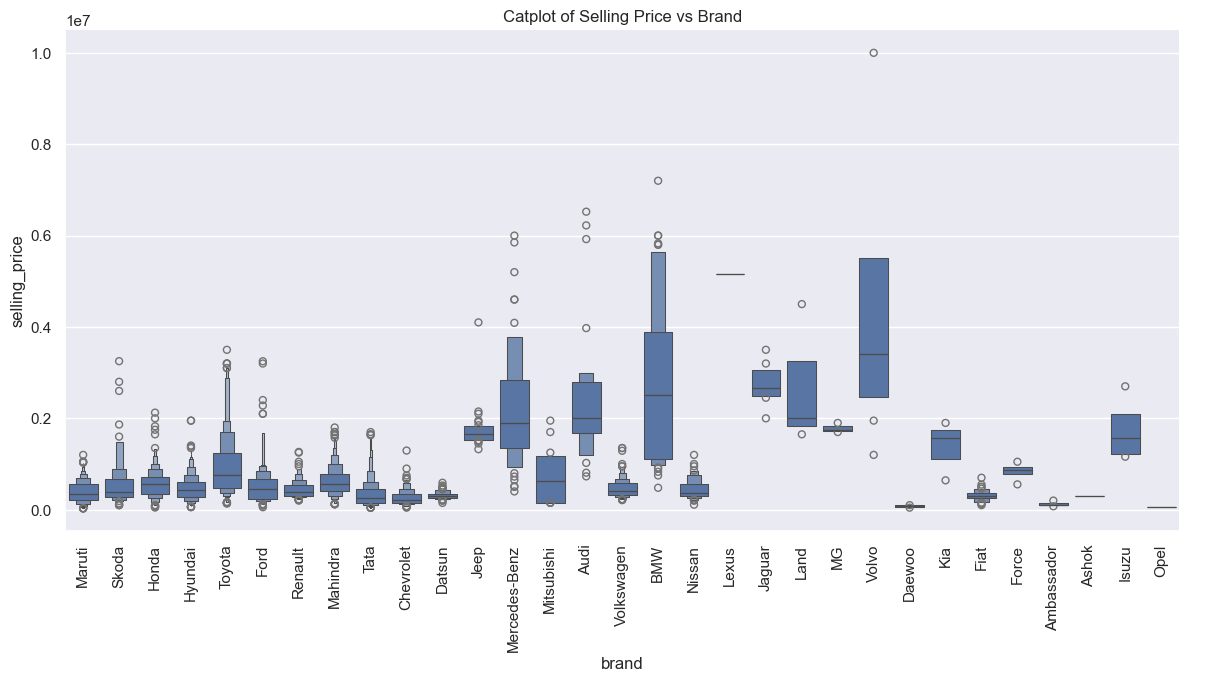

In [163]:
# Categorical plot 
sns.catplot(x="brand", y="selling_price", data=df_cleaned, kind="boxen", height=6, aspect=2)

plt.xticks(rotation=90)
plt.title("Catplot of Selling Price vs Brand")
plt.show()

### Insights from Selling Price vs Brand

- Budget brands (Maruti, Hyundai, Tata, etc.) show low and consistent resale prices.  
- Mid-tier brands (Toyota, Honda, Skoda, VW) have slightly higher resale with wider spread.  
- Luxury brands (BMW, Audi, Mercedes, Jaguar, Volvo, etc.) show very high resale values with large variability.  
- Discontinued brands (Daewoo, Fiat, Opel, Ambassador) have poor resale performance.  
- Overall, **brand strongly influences resale price**, with luxury brands holding the highest values.  


In [164]:
# Brand is nominal (e.g., Maruti, Hyundai, BMW). 
# We use One-Hot Encoding so each brand becomes a separate column (0/1)

brand = pd.get_dummies(df_cleaned[["brand"]], drop_first=True)
brand.head()

,brand_Ashok,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,brand_Ford,brand_Honda,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [165]:
df_cleaned["fuel"].value_counts()

fuel
Diesel    3658
Petrol    2973
CNG         51
LPG         35
Name: count, dtype: int64

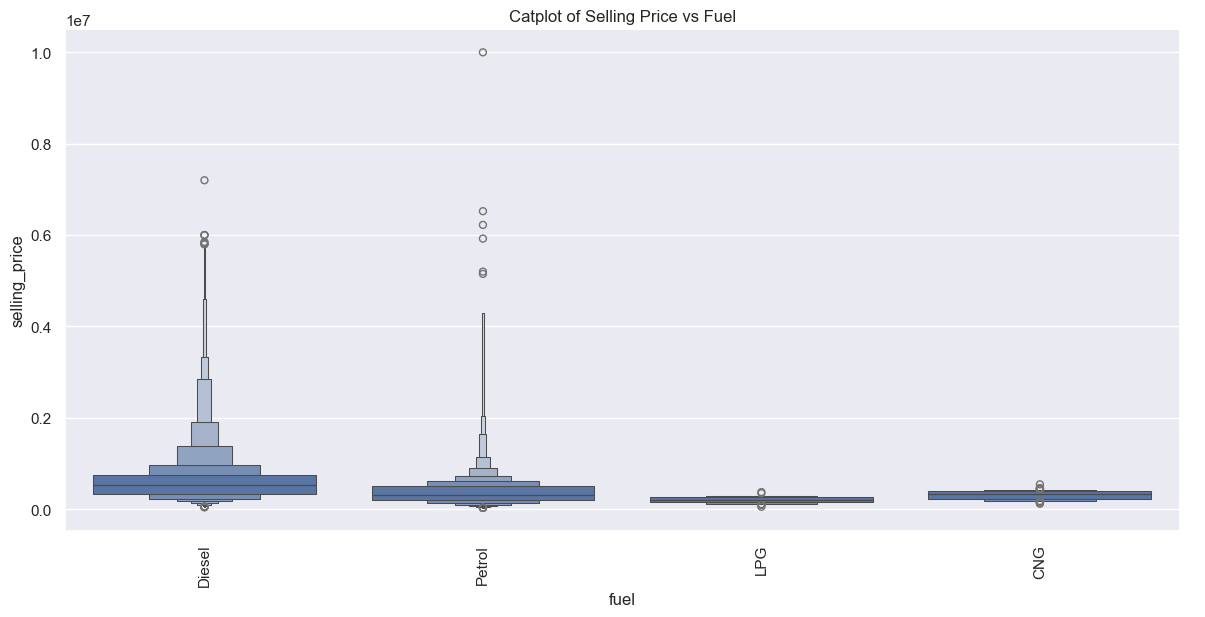

In [166]:
# Categorical plot 
sns.catplot(x="fuel", y="selling_price", data=df_cleaned, kind="boxen", height=6, aspect=2)

plt.xticks(rotation=90)
plt.title("Catplot of Selling Price vs Fuel")
plt.show()

### Insights from Boxplot of Selling Price vs Fuel

1. **Median Price Difference** – Different fuel types show clear differences in their median selling prices, meaning fuel type strongly influences car valuation.  
2. **Diesel vs Petrol Spread** – Diesel cars have a wider spread in prices compared to Petrol, showing more variability in the used car market.  
3. **Luxury Outliers** – Both Petrol and Diesel categories have extreme outliers, likely representing luxury or premium segment cars.  
4. **Low-value Clusters** – CNG/LPG cars generally have lower median prices, making them more budget-friendly options in the resale market.  
5. **Market Trend** – Petrol dominates lower-to-mid price ranges, Diesel spans a broader range (from budget to premium), while alternative fuels stay in lower brackets.


In [167]:
# Fuel type is nominal, no inherent order. 
# One-Hot Encoding is used to create binary columns for each fuel type.

fuel = pd.get_dummies(df_cleaned[["fuel"]], drop_first=True)
fuel.head()

,fuel_Diesel,fuel_LPG,fuel_Petrol
0,True,False,False
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True


In [168]:
df_cleaned["seller_type"].value_counts()

seller_type
Individual          6024
Dealer               666
Trustmark Dealer      27
Name: count, dtype: int64

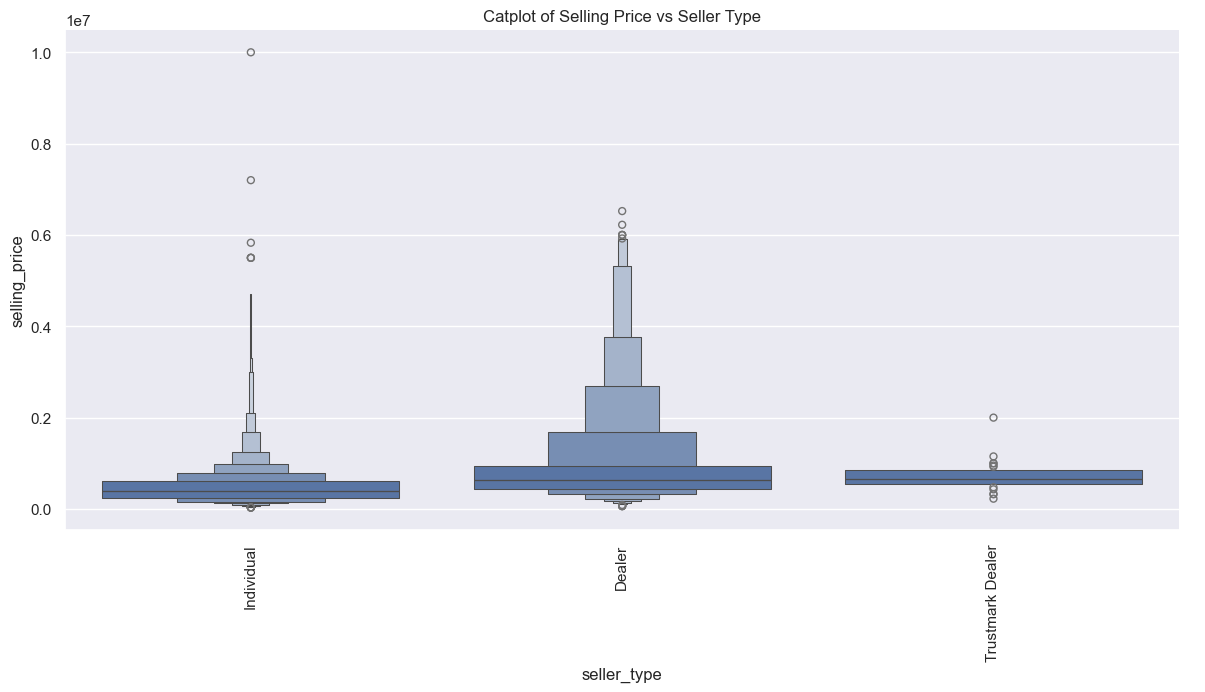

In [169]:
# Categorical plot 
sns.catplot(x="seller_type", y="selling_price", data=df_cleaned, kind="boxen", height=6, aspect=2)

plt.xticks(rotation=90)
plt.title("Catplot of Selling Price vs Seller Type")
plt.show()


### Insights from Boxplot of Selling Price vs Seller Type

1. **Dealers** show the widest price distribution, covering both budget and premium cars, indicating a diverse inventory.  
2. **Individual sellers** mostly cluster in the lower-to-mid price range, with a few extreme outliers representing luxury cars.  
3. **Trustmark Dealers** have a more consistent pricing pattern with fewer outliers, suggesting standardization or certification in pricing.  
4. The **median selling price** is fairly similar across seller types, but variance differs significantly.  
5. Extreme high-value cars are more commonly sold by **Dealers**, while Individuals and Trustmark Dealers deal in narrower segments.


In [170]:
# Seller type is nominal. 
# One-Hot Encoding converts seller categories into dummy variables.

seller_type = pd.get_dummies(df_cleaned[["seller_type"]], drop_first=True)
seller_type.head()


,seller_type_Individual,seller_type_Trustmark Dealer
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [171]:
df_cleaned["transmission"].value_counts()

transmission
Manual       6142
Automatic     575
Name: count, dtype: int64

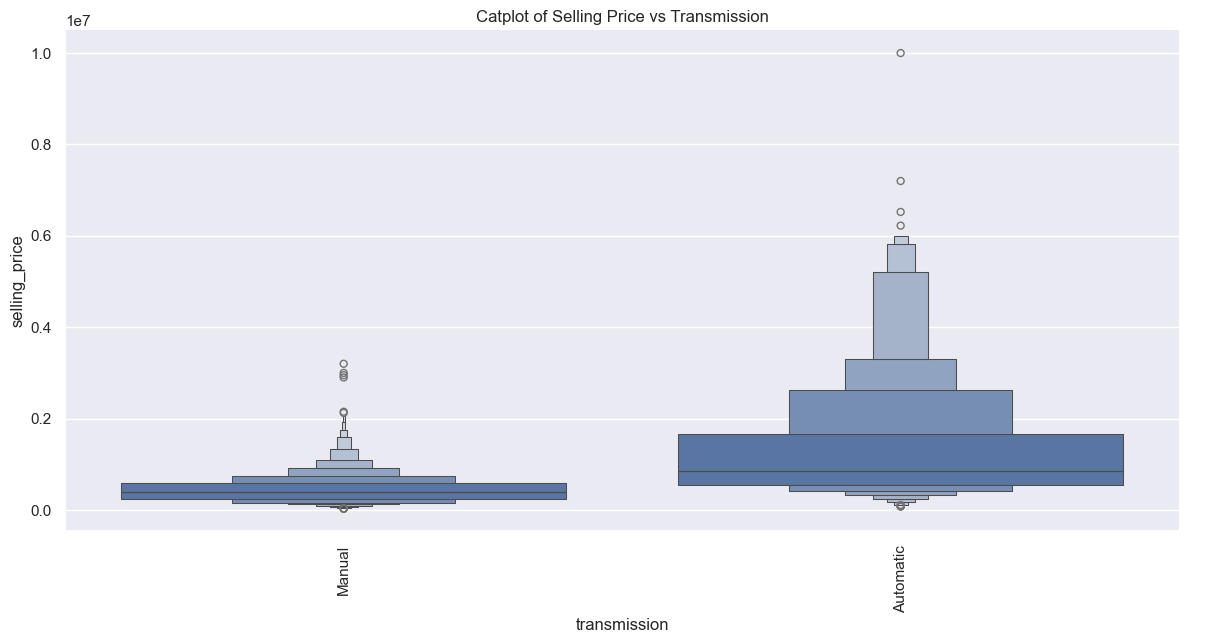

In [172]:
# Categorical plot 
sns.catplot(x="transmission", y="selling_price", data=df_cleaned, kind="boxen", height=6, aspect=2)

plt.xticks(rotation=90)
plt.title("Catplot of Selling Price vs Transmission")
plt.show()


### Insights from Boxplot of Selling Price vs Transmission

1. **Automatic cars** generally have higher selling prices compared to **Manual cars**, reflecting higher technology and premium positioning.  
2. **Manual cars** dominate the lower-to-mid price range, making them more budget-friendly options.  
3. The **price variance** is much larger in Automatics, with extreme outliers indicating presence of high-end luxury vehicles.  
4. Manual cars show a tighter price distribution, meaning more standardized and predictable pricing.  
5. Median selling price of Automatics is significantly higher, suggesting stronger demand or higher perceived value.  
6. Outliers are more prominent in Automatics, highlighting their association with luxury or rare models.  


In [173]:
# Transmission type is nominal (Manual vs Automatic). 
# One-Hot Encoding is applied to represent this as binary columns.


transmission = pd.get_dummies(df_cleaned[["transmission"]], drop_first=True)
transmission.head()


,transmission_Manual
0,True
1,True
2,True
3,True
4,True


In [174]:
df_cleaned["owner"].value_counts()

owner
First Owner             4176
Second Owner            1888
Third Owner              493
Fourth & Above Owner     155
Test Drive Car             5
Name: count, dtype: int64

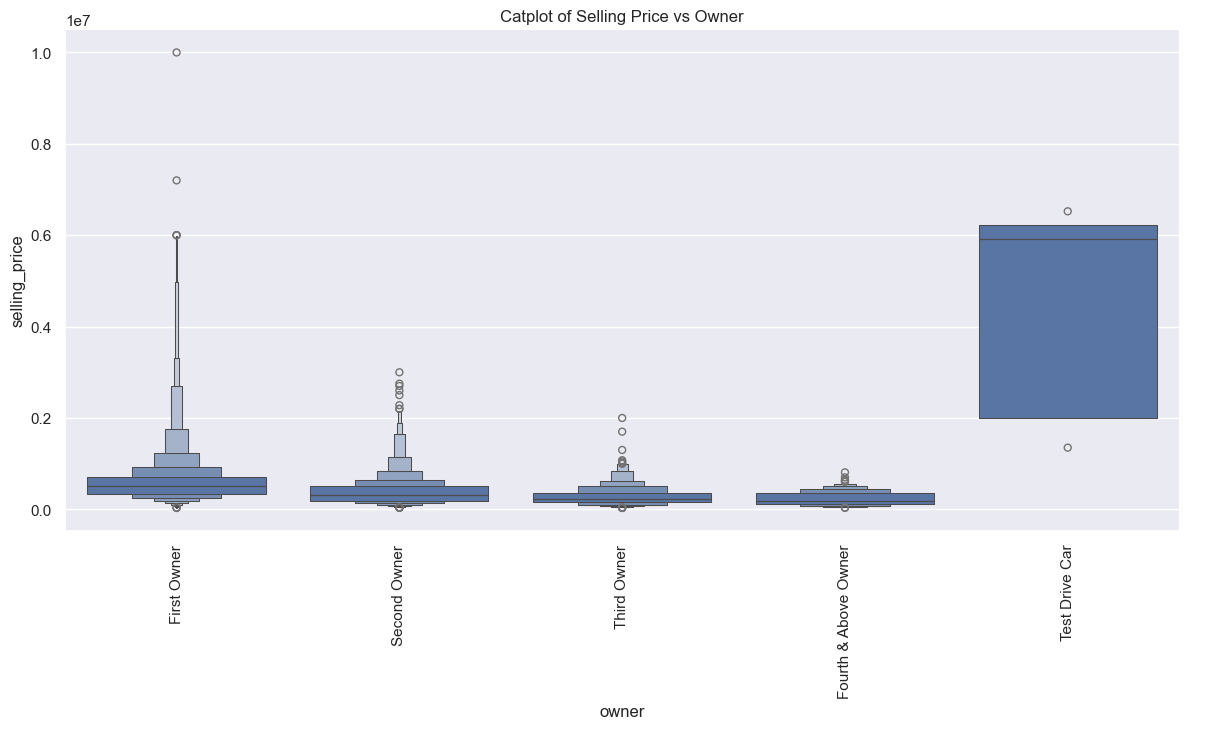

In [175]:
# Categorical plot 
sns.catplot(x="owner", y="selling_price", data=df_cleaned, kind="boxen", height=6, aspect=2)

plt.xticks(rotation=90)
plt.title("Catplot of Selling Price vs Owner")
plt.show()

### Insights from Boxplot of Selling Price vs Ownership

1. **First Owner cars** retain the highest resale value among used cars, with a wider price spread and higher median compared to later owners.  
2. **Second Owner cars** show a clear drop in resale value, with reduced median and narrower distribution.  
3. **Third and 4th+ Owner cars** have significantly lower selling prices, reflecting depreciation and reduced buyer trust.  
4. Price variance shrinks as ownership count increases, indicating limited demand and predictable low pricing.  
5. **Test Drive Cars** stand out with unusually high median prices, suggesting these are almost-new or showroom/demo vehicles.  
6. Outliers are more frequent in First and Second Owner groups, representing premium models that hold higher resale value.  


In [176]:
# Owner is ordinal → Map categories to integers
# We map it to numbers to preserve ownership order (First < Second < Third < Fourth+).

owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 0
}
df_cleaned["owner"] = df_cleaned["owner"].map(owner_mapping)
df_cleaned[["owner"]].head()


,owner
0,1
1,2
2,3
3,1
4,1


In [177]:

# Concatenate dataframe --> df_cleaner + brand + fuel + seller_type + transmission + owner

df_cleaned = pd.concat([df_cleaned, brand, fuel, seller_type, transmission ], axis = 1)

In [178]:
## Droping the categorical columns

df_cleaned.drop(["brand", "fuel", "seller_type" , "transmission" ], axis = 1, inplace = True)

In [179]:
df_cleaned

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,brand_Ashok,brand_Audi,...,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,2014,450000,145500,1,23.40,1248,74.00,5.0,False,False,...,False,False,False,False,True,False,False,True,False,True
1,2014,370000,120000,2,21.14,1498,103.52,5.0,False,False,...,False,False,False,False,True,False,False,True,False,True
2,2006,158000,140000,3,17.70,1497,78.00,5.0,False,False,...,False,False,False,False,False,False,True,True,False,True
3,2010,225000,127000,1,23.00,1396,90.00,5.0,False,False,...,False,False,False,False,True,False,False,True,False,True
4,2007,130000,120000,1,16.10,1298,88.20,5.0,False,False,...,False,False,False,False,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,2013,260000,50000,2,18.90,998,67.10,5.0,False,False,...,False,False,False,False,False,False,True,True,False,True
6713,2014,475000,80000,2,22.54,1396,88.73,5.0,False,False,...,False,False,False,False,True,False,False,True,False,True
6714,2013,320000,110000,1,18.50,1197,82.85,5.0,False,False,...,False,False,False,False,False,False,True,True,False,True
6715,2007,135000,119000,4,16.80,1493,110.00,5.0,False,False,...,False,False,False,False,True,False,False,True,False,True


In [180]:
df_cleaned.shape

(6717, 44)

In [181]:
df_cleaned.columns.T

Index(['year', 'selling_price', 'km_driven', 'owner', 'mileage', 'engine',
       'max_power', 'seats', 'brand_Ashok', 'brand_Audi', 'brand_BMW',
       'brand_Chevrolet', 'brand_Daewoo', 'brand_Datsun', 'brand_Fiat',
       'brand_Force', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia', 'brand_Land',
       'brand_Lexus', 'brand_MG', 'brand_Mahindra', 'brand_Maruti',
       'brand_Mercedes-Benz', 'brand_Mitsubishi', 'brand_Nissan', 'brand_Opel',
       'brand_Renault', 'brand_Skoda', 'brand_Tata', 'brand_Toyota',
       'brand_Volkswagen', 'brand_Volvo', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual'],
      dtype='object')

In [182]:
non_numeric_columns = df_cleaned.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns.tolist())

Non-numeric columns: ['brand_Ashok', 'brand_Audi', 'brand_BMW', 'brand_Chevrolet', 'brand_Daewoo', 'brand_Datsun', 'brand_Fiat', 'brand_Force', 'brand_Ford', 'brand_Honda', 'brand_Hyundai', 'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia', 'brand_Land', 'brand_Lexus', 'brand_MG', 'brand_Mahindra', 'brand_Maruti', 'brand_Mercedes-Benz', 'brand_Mitsubishi', 'brand_Nissan', 'brand_Opel', 'brand_Renault', 'brand_Skoda', 'brand_Tata', 'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Manual']


## Feature Selection

In [183]:
# Features (independent variables)
X = df_cleaned.drop(["selling_price"], axis=1)

# Target (dependent variable)
y = df_cleaned["selling_price"]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (6717, 43)
Shape of y: (6717,)


In [184]:
y.head()


0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

In [185]:
X.head()

,year,km_driven,owner,mileage,engine,max_power,seats,brand_Ashok,brand_Audi,brand_BMW,...,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,2014,145500,1,23.40,1248,74.00,5.0,False,False,False,...,False,False,False,False,True,False,False,True,False,True
1,2014,120000,2,21.14,1498,103.52,5.0,False,False,False,...,False,False,False,False,True,False,False,True,False,True
2,2006,140000,3,17.70,1497,78.00,5.0,False,False,False,...,False,False,False,False,False,False,True,True,False,True
3,2010,127000,1,23.00,1396,90.00,5.0,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,2007,120000,1,16.10,1298,88.20,5.0,False,False,False,...,False,False,False,False,False,False,True,True,False,True


In [186]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (5373, 43) (5373,)
Testing set shape: (1344, 43) (1344,)


### Linear Regression

In [187]:
## Standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [188]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)


LinearRegression()

In [189]:
# Predict on training set
y_train_pred = lin_reg.predict(X_train)

# Predict on test set
y_test_pred = lin_reg.predict(X_test)


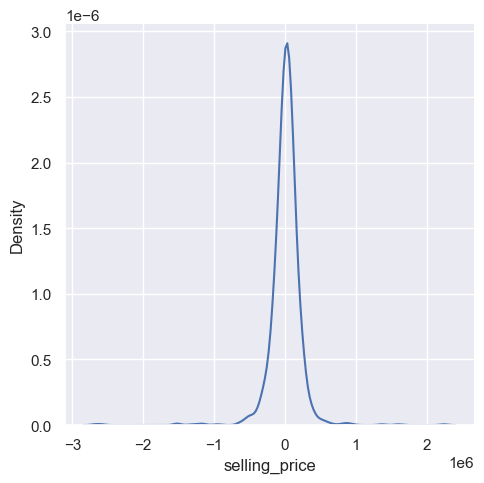

In [190]:
sns.displot(y_test_pred-y_test,kind='kde')

In [191]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# R² score
print("Training R2 Score:", r2_score(y_train, y_train_pred))
print("Testing R2 Score:", r2_score(y_test, y_test_pred))

# RMSE
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Testing RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))


Training R2 Score: 0.7319633632634873
Testing R2 Score: 0.7655711747830956
Training RMSE: 277665.4861178046
Testing RMSE: 226805.86137322162


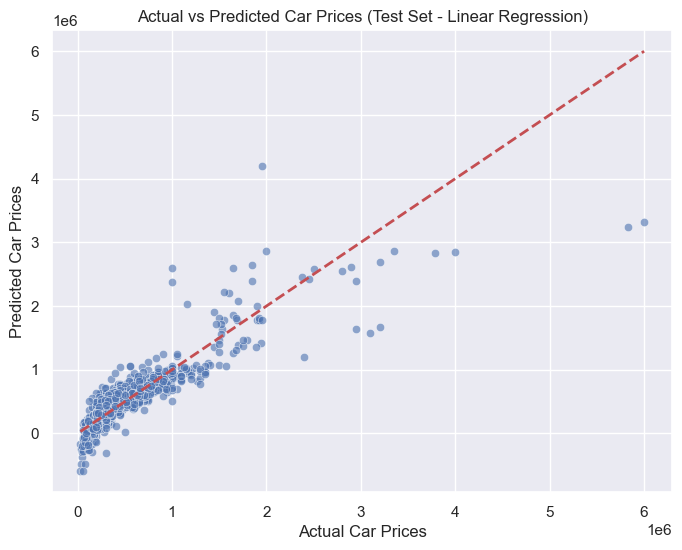

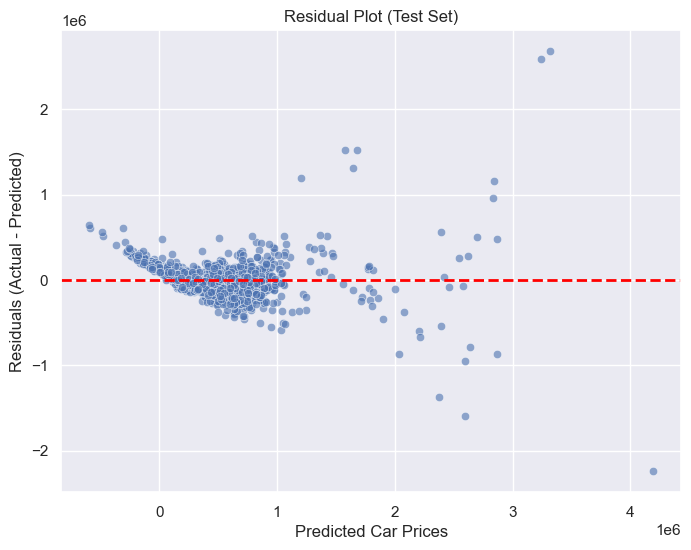

In [192]:

# Scatter Plot: Actual vs Predicted (Test Set)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect fit line
plt.xlabel("Actual Car Prices")
plt.ylabel("Predicted Car Prices")
plt.title("Actual vs Predicted Car Prices (Test Set - Linear Regression)")
plt.show()

# Residual Plot: Errors vs Predicted
residuals = y_test - y_test_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel("Predicted Car Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Test Set)")
plt.show()


In [204]:
# Finds correlation between Independent and dependent attributes
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)
training= df_cleaned[['year', 'selling_price', 'km_driven', 'owner', 'mileage', 'engine' , 'max_power' , 'seats']]
training.head()



Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'brand',
       'model'],
      dtype='object')


,year,selling_price,km_driven,owner,mileage,engine,max_power,seats
0,2014,450000,145500,1,23.40,1248,74.00,5.0
1,2014,370000,120000,2,21.14,1498,103.52,5.0
2,2006,158000,140000,3,17.70,1497,78.00,5.0
3,2010,225000,127000,1,23.00,1396,90.00,5.0
4,2007,130000,120000,1,16.10,1298,88.20,5.0


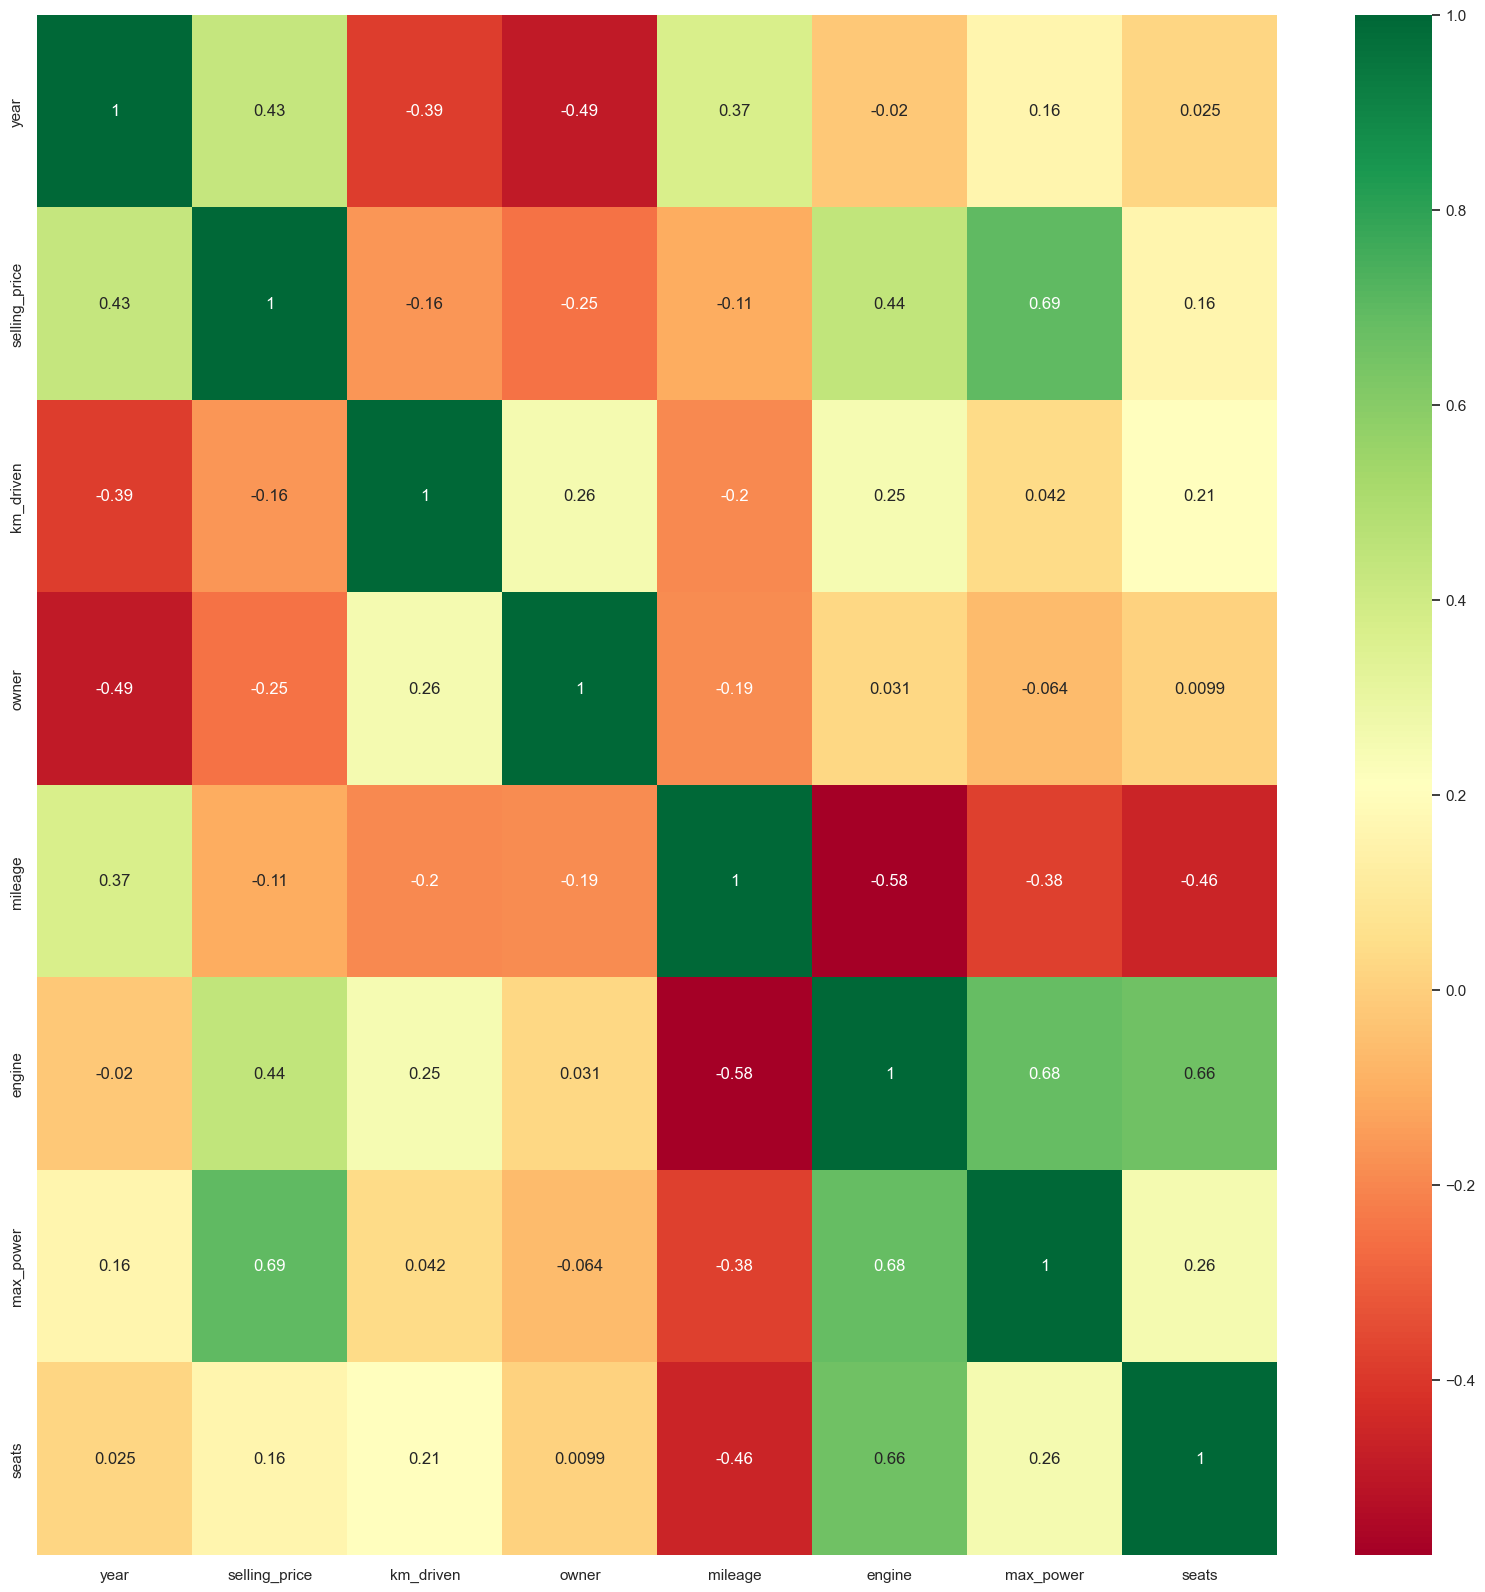

In [205]:

plt.figure(figsize = (20,20))
sns.heatmap(training.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [206]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
Selection = ExtraTreesRegressor()
Selection.fit(X,y)

ExtraTreesRegressor()

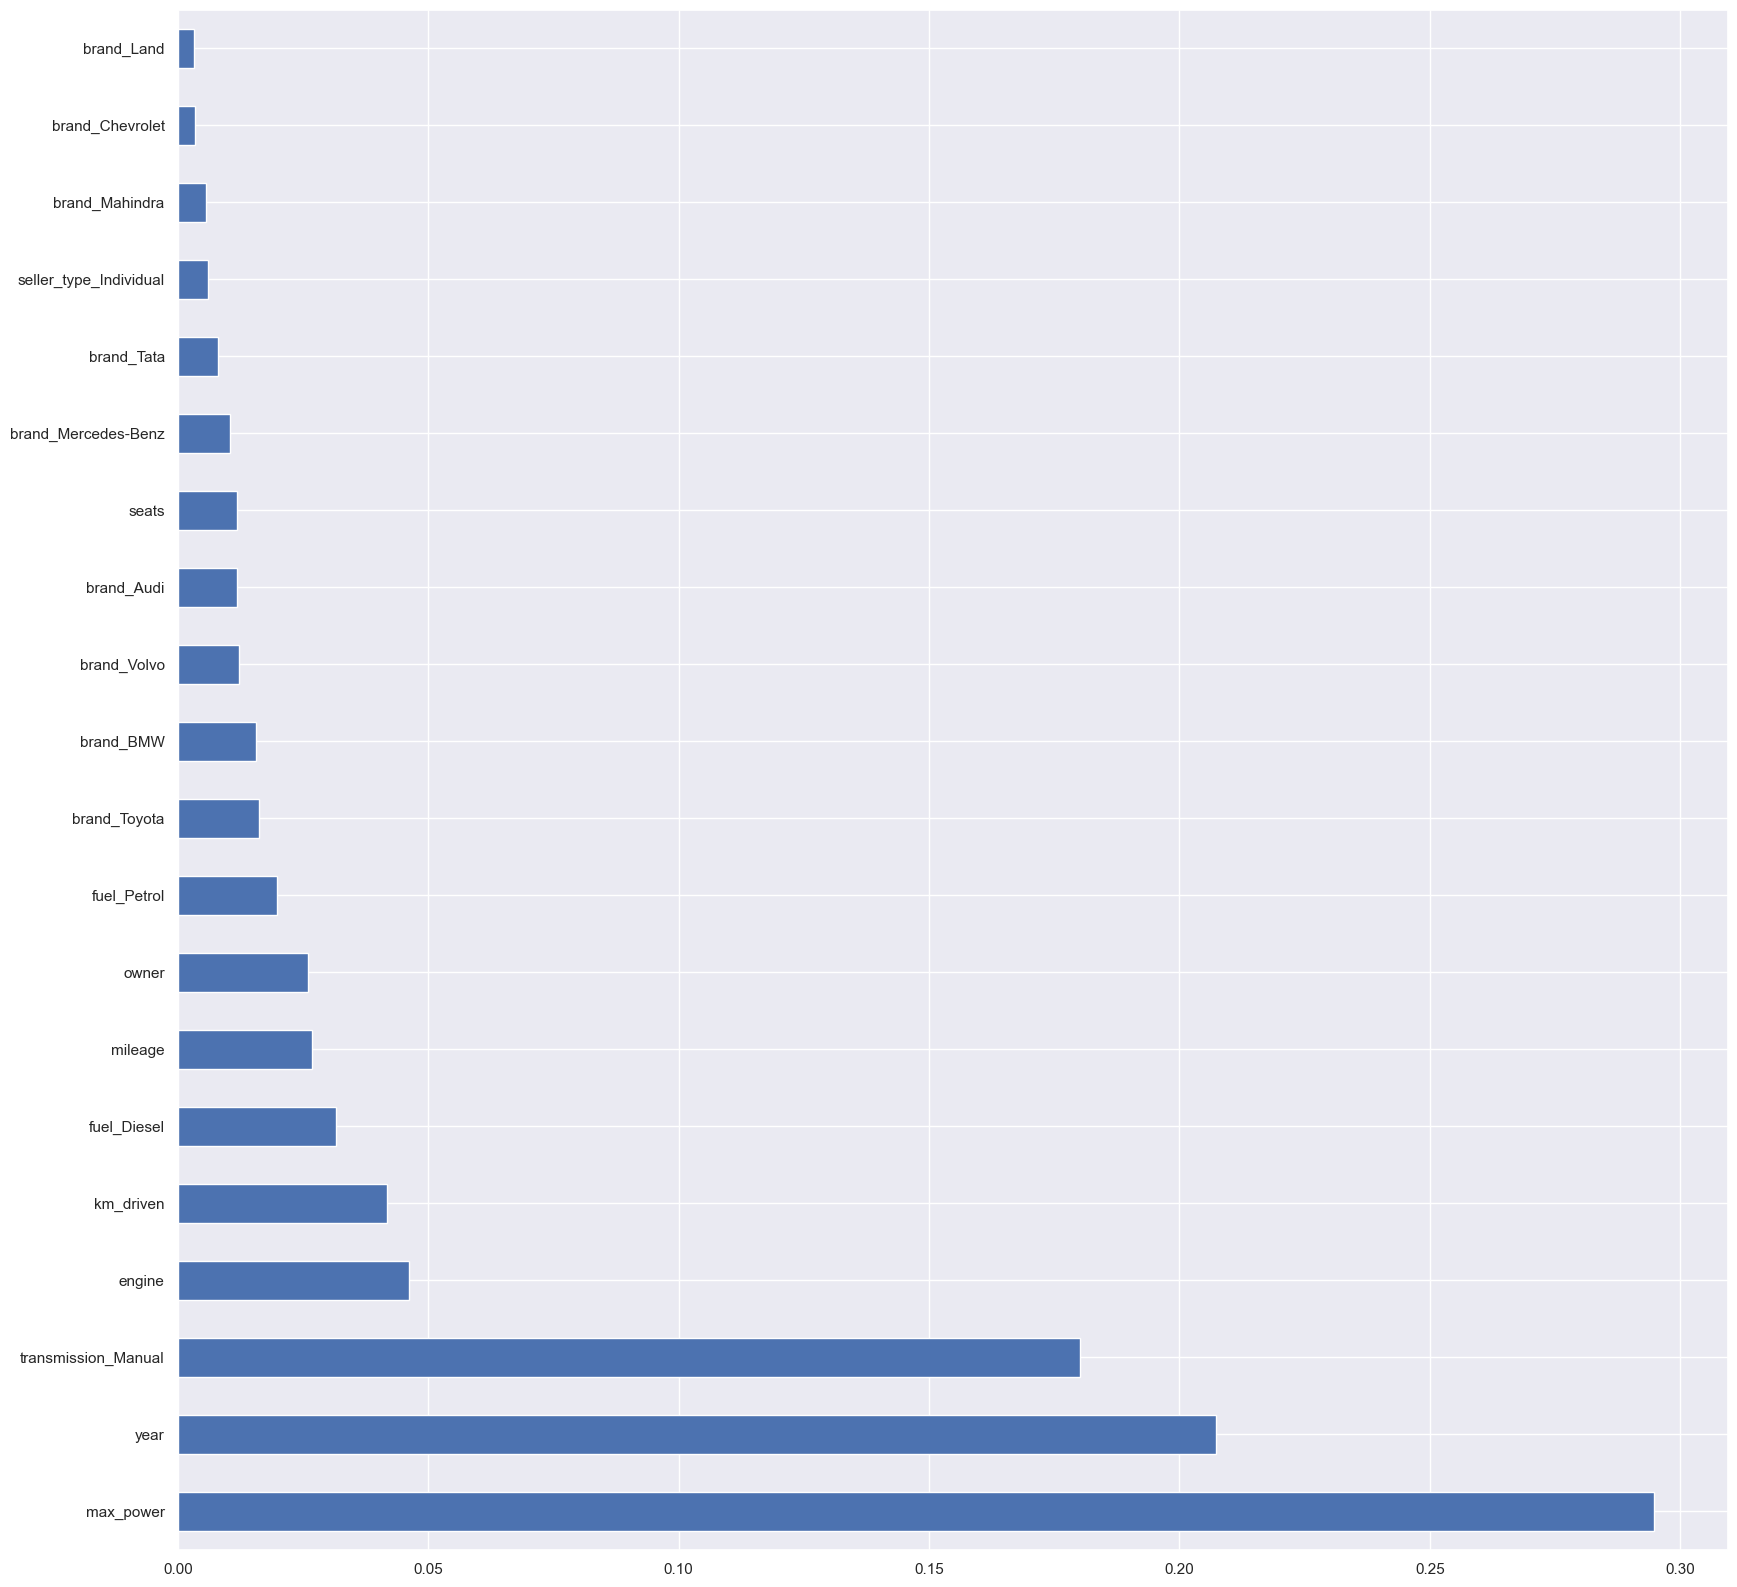

In [207]:
#plot graph of feature importances for better visualization
plt.figure(figsize=(20,20))
feat_importances= pd.Series(Selection.feature_importances_,index= X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Fitting model using Random Forest

In [208]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [209]:
y_pred= model.predict(X_test)

In [210]:
model.score(X_train, y_train)

0.9863589799755096

In [211]:
model.score(X_test, y_test)

0.9311581998177625

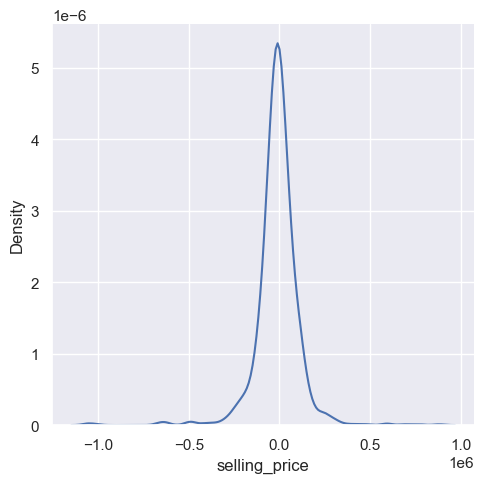

In [212]:
sns.displot(y_test-y_pred,kind='kde')
plt.show()

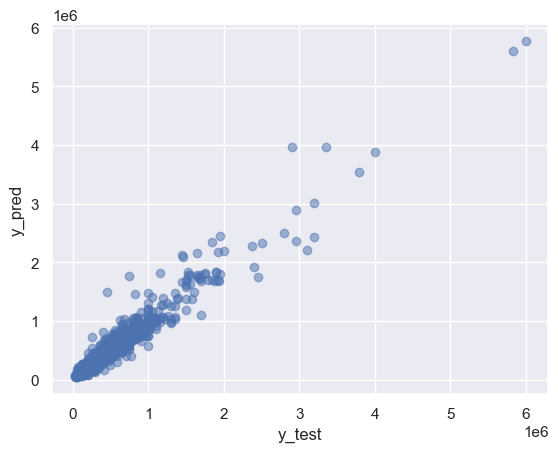

In [213]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [214]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 74044.66097684138
MSE: 15106009552.747269
RMSE: 122906.50736534363


In [215]:
metrics.r2_score(y_test, y_pred)

0.9311581998177625

### Hyper parameter Tuning

In [216]:
from sklearn.model_selection import RandomizedSearchCV

In [217]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [218]:
# creating random grid:

random_grid= {"n_estimators": n_estimators,'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [219]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [220]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\Jayes\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Jayes\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Jayes\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\Jayes\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [223]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [224]:
prediction = rf_random.predict(X_test)

<Figure size 800x800 with 0 Axes>

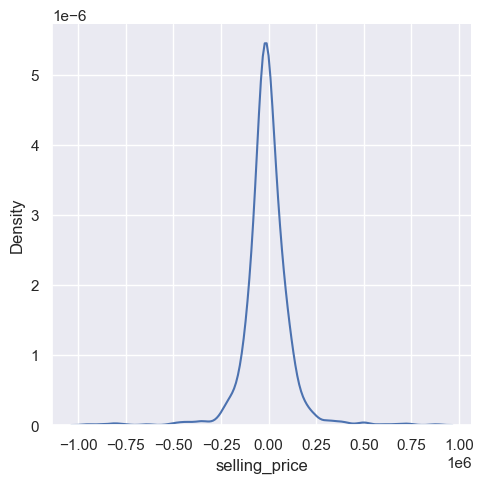

In [225]:
plt.figure(figsize = (8,8))
sns.displot(y_test-prediction,kind='kde')
plt.show()

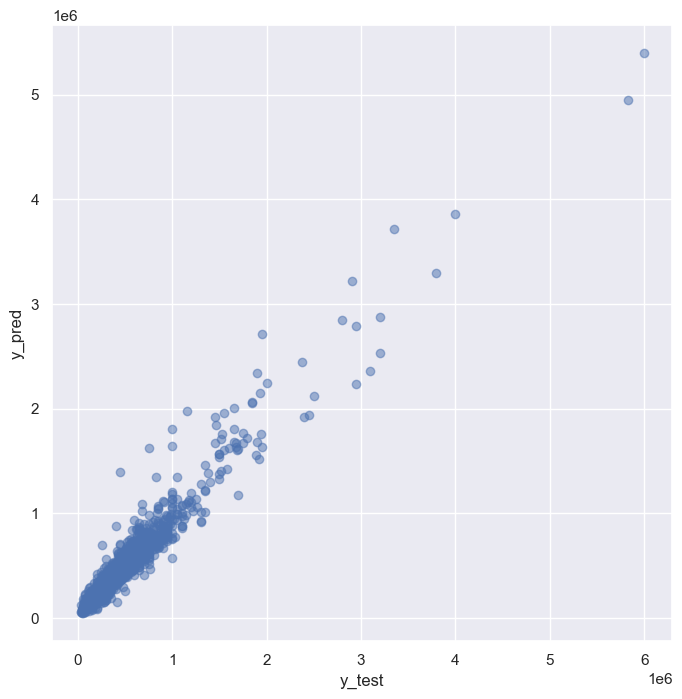

In [226]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [227]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 74156.01830865566
MSE: 14787360877.18951
RMSE: 121603.29303595981


In [228]:
# training_r2 = r2_score(X_train, y_train)
tuned_r2 = r2_score(y_test, y_pred_best)
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))

print("Tuned Model R2:", tuned_r2)
print("Tuned Model RMSE:", tuned_rmse)

# Mean of actual car prices
mean_price = y.mean()
print("Mean Car Price:", mean_price)

# Relative RMSE (%)
relative_rmse = (tuned_rmse / mean_price) * 100
print("Relative RMSE (%):", relative_rmse)

Tuned Model R2: 0.9299408284652554
Tuned Model RMSE: 123988.4603172794
Mean Car Price: 526385.9970224802
Relative RMSE (%): 23.554665401174084


## XGBoost

In [229]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize XGBoost Regressor
xgb_reg = XGBRegressor(
    n_estimators=500,      # number of trees
    learning_rate=0.05,    # step size shrinkage
    max_depth=6,           # tree depth
    subsample=0.8,         # use 80% of data per tree
    colsample_bytree=0.8,  # use 80% of features per tree
    random_state=42,
    n_jobs=-1
)

# Train the model
xgb_reg.fit(X_train, y_train)

# Predictions
y_train_pred_xgb = xgb_reg.predict(X_train)
y_test_pred_xgb = xgb_reg.predict(X_test)



XGBoost Results
----------------------
Training R2 Score: 0.9861472249031067
Testing R2 Score: 0.9381114840507507
Training RMSE: 63123.804194614255
Testing RMSE: 116534.29503798443
Mean Car Price: 526385.9970224802
Relative RMSE (%): 22.13856289817064


In [238]:
# Evaluation
print("XGBoost Results")
print("----------------------")
print("Training R2 Score:", r2_score(y_train, y_train_pred_xgb))
print("Testing R2 Score:", r2_score(y_test, y_test_pred_xgb))

train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

print("Training RMSE:", train_rmse_xgb)
print("Testing RMSE:", test_rmse_xgb)

# Relative RMSE
print("Mean Car Price:", y.mean())
print("Relative RMSE (%):", (test_rmse_xgb / y.mean()) * 100)


XGBoost Results
----------------------
Training R2 Score: 0.9861472249031067
Testing R2 Score: 0.9381114840507507
Training RMSE: 63123.804194614255
Testing RMSE: 116534.29503798443
Mean Car Price: 526385.9970224802
Relative RMSE (%): 22.13856289817064


<Figure size 800x800 with 0 Axes>

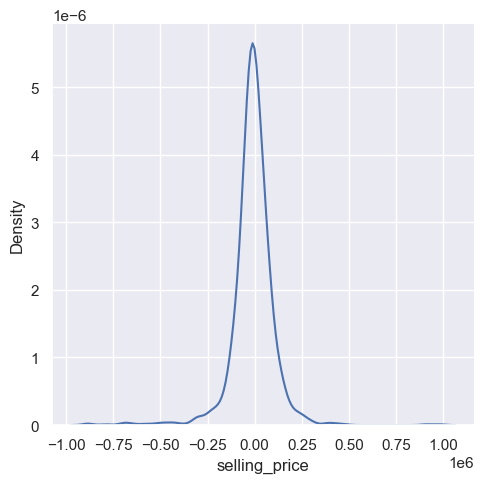

In [230]:
plt.figure(figsize = (8,8))
sns.displot(y_test-y_test_pred_xgb,kind='kde')
plt.show()

## Hyper parameter Tuning

In [239]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define parameter grid
param_dist = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.5, 1, 1.5, 2]
}

# Initialize model
xgb = XGBRegressor(
    random_state=42,
    n_jobs=-1
)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,             # number of random combinations to try
    scoring='r2',          # you can also use 'neg_root_mean_squared_error'
    cv=5,                  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Train best model
best_xgb = random_search.best_estimator_

# Predictions
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

# Evaluate
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Training R2: {train_r2:.4f}")
print(f"Test R2: {test_r2:.4f}")
print(f"Test RMSE: {rmse:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alpha': 1, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.8}
Training R2: 0.9797
Test R2: 0.9431
Test RMSE: 111741.7182


<Figure size 800x800 with 0 Axes>

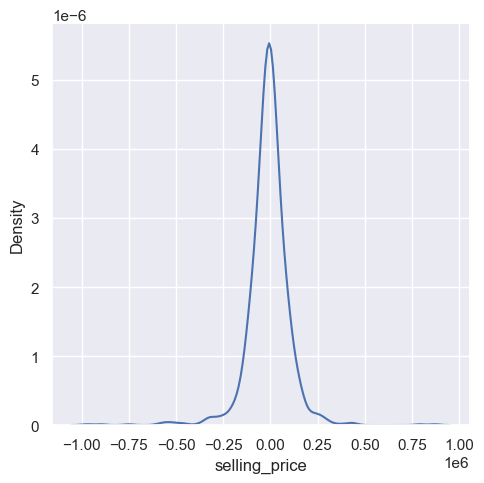

In [245]:
plt.figure(figsize = (8,8))
sns.displot(y_test-y_test_pred,kind='kde')
plt.show()

## Saving the model for future use



In [240]:
import pickle

# Save the model
with open("xgb_model.pkl", "wb") as file:
    pickle.dump(best_xgb, file)




In [241]:
# loading the model:
with open("xgb_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)



In [243]:
# Using loaded model for predictions
y_pred_final = loaded_model.predict(X_test)


In [244]:
metrics.r2_score(y_test, y_pred_final)

0.9430972933769226